# TF-IDF 

In [39]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [44]:
data = pd.read_csv("newtrain.csv")

In [53]:
dup = data.pop('is_duplicate')

In [63]:

tfidf_vectorizer = TfidfVectorizer(
    encoding='utf-8',
    analyzer='word',
    strip_accents='unicode',
    ngram_range=(1, 1),
    lowercase=True,
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True,)

cosine_vals = []

for i in data.id:
    try:
        tfidf_matrix = tfidf_vectorizer.fit_transform([data.loc[i]['question1'], data.loc[i]['question2']])
        cosine_vals.append(cosine_similarity(tfidf_matrix[0:1], tfidf_matrix)[0][1])
    except:
        cosine_vals.append(0)

In [65]:
from  sklearn.metrics import accuracy_score, log_loss

print(log_loss(dup, cosine_vals))

1.1239223795194326


In [66]:
threshold = [0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9]
for thresh in threshold:
    y_pred = []
    for cosine in cosine_vals:
        if cosine>thresh:
            cosine = 1
        else:
            cosine = 0
        y_pred.append(cosine)

    print(accuracy_score(dup, y_pred))

0.6549011847930941
0.6624131192955551
0.6644067377377625
0.6643127458012813
0.6628064013455688
0.6609315095599694
0.661567191867224
0.6652897672462836
0.667120136535655
0.6665413440846917
0.6667021197655149


## Report - Using tfidf model to identify duplicate question pairs

Implementation

    TTfidf metrix helps us to transform words into numbers, and in our case each question will be represented by a vector. Then we can decide duplication by computing vectors, that is to see how large the difference between two vectors. Our initial idea is to generate tfidf metrix by transforming the whole question1/question2 into a metrix. Then we can use SVD to select most imporatnt features and at the same time reduce dimensionality. However, we encountered memory error when trying to fit_transform the data because the metrix is huge. (See the image below for code)

    Then we decided to build a metrix for each question pair one by one, so that in this way we won't encounter memory error. Then we compare the similarity of question1 and question2 by measuring the difference of vector using cosine similarity. So in the end it returned probability of duplicate for each question pair.
    
    Because We are not sure about which threshold we should use for classifying the cosine similarity result, we just try numbers around 0.5 one by one. 


Open Source Package

    We used regular packages - Numpy and Pandas to deal with data. 
    For this part we import TfidfVectorizer from sklearn.feature_extraction.text to convert text data to numbers, and then we import cosine_similarity from sklearn.metrics.pairwise to calculate the cosine similarity of two vectors in a pair.



Result

    Because the model give us values in terms of probabilities,it is suitable to use loss log to measure the uncertainty of the probability of model by comparing them to the true labels.(Reference(3)) The log loss is 1.1265146865556896.
    
    Then we want to see how accurate the model is. The question is how to set the threshold for partitioning data into class 0 and class 1. We set the threshhold by hand, and the value is always around 0.667.
    
    This tfidf model is very basic, so we don't expect that it will perform extremely well. 


Reference

    (1) http://sergeiturukin.com/2017/04/07/kaggle-quora-part1.html
    
    (2) https://github.com/ab-bh/Quora-Duplicate-Question-Pairs/blob/master/TF-IDF%20Approach%20.ipynb
    
    (3) https://www.quora.com/What-is-an-intuitive-explanation-for-the-log-loss-function
    
    (4) https://github.com/YuriyGuts/kaggle-quora-question-pairs/blob/master/notebooks/feature-tfidf.ipynb

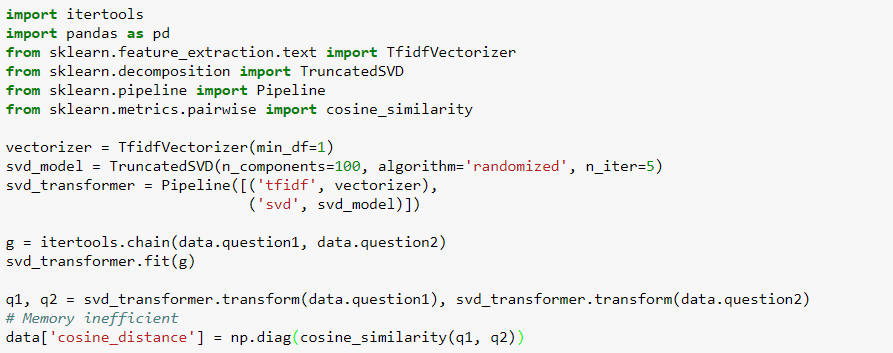

In [12]:
from IPython.display import Image
Image(filename = "memoryError.png", width=1000, height=100)